GSEAPY Example
--------------------------------------------

### Examples to use ``GSEApy`` inside python console

## 1.  Load essential packages

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina' # mac
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

**Check gseapy version**

In [2]:
gp.__version__

'0.9.8'

**See all supported enrichr library names** 

Enrichr library could be used for ``gsea``, ``ssgsea``, and ``prerank``, too

In [3]:
names = gp.get_library_name()
names[:10]

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_down']

## 2. Enrichr Example

### 1)  Assign enrichr with ``pd.Series``,  ``pd.DataFrame``, or ``list`` object

In [4]:
gene_list = pd.read_table("./data/gene_list.txt",header=None)
gene_list.head()

,0
0,IGKV4-1
1,CD55
2,IGKC
3,PPFIBP1
4,ABHD4


In [5]:
type(gene_list)

pandas.core.frame.DataFrame

In [6]:
# convert dataframe or series to list
glist = gene_list.squeeze().tolist()
print(glist[:10])

['IGKV4-1', '           CD55', '           IGKC', '        PPFIBP1', '          ABHD4', '          PCSK6', '            PGD', '        ARHGDIB', '          ITGB2', '          CARD6']


#### a. gene_sets support list, str.  
Multi-libraries names supported, separate each name by comma 

In [7]:
# run enrichr
# if you are only intrested in dataframe that enrichr returned, please set no_plot=True

# list, dataframe, series inputs are supported
enr = gp.enrichr(gene_list="./data/gene_list.txt", 
                 # or gene_list='./gene_list.txt', or gene_list=glist
                 description='test_name', 
                 # or gene_sets='KEGG_2016,KEGG_2013',
                 # or gene_sets=['KEGG_2016','KEGG_2013'],
                 gene_sets='KEGG_2016', 
                 outdir='test/enrichr_kegg', 
                 cutoff=0.5 # test dataset, use lower value of range(0,1)
                )

In [8]:
# access results through res2d attr
# obj.res2d only stores the last enrichr result in your input libraries
enr.res2d.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Z-score,Combined Score,Genes
0,KEGG_2016,Osteoclast differentiation_Homo sapiens_hsa04380,28/132,3.105774e-13,7.888667e-11,9.026468e-10,2.292723e-07,-1.864151,53.688178,LILRA6;ITGB3;LILRA2;LILRA5;PPP3R1;FCGR3B;SIRPA...
1,KEGG_2016,Tuberculosis_Homo sapiens_hsa05152,31/178,4.290025e-12,5.448332e-10,7.302987e-09,9.274793e-07,-1.779908,46.588613,RAB5B;ITGB2;PPP3R1;HLA-DMA;FCGR3B;HLA-DMB;CASP...
2,KEGG_2016,Phagosome_Homo sapiens_hsa04145,28/154,1.614506e-11,1.366949e-09,1.787601e-08,1.513502e-06,-1.658580,41.214733,ATP6V1A;RAB5B;ITGB5;ITGB3;ITGB2;HLA-DMA;FCGR3B...
3,KEGG_2016,Leishmaniasis_Homo sapiens_hsa05140,17/73,3.133213e-09,1.591672e-07,6.539155e-07,3.321891e-05,-1.744263,34.154775,TGFB1;IFNGR1;PRKCB;IFNGR2;ITGB2;FOS;MAPK14;HLA...
4,KEGG_2016,Rheumatoid arthritis_Homo sapiens_hsa05323,19/90,2.198322e-09,1.395934e-07,5.292880e-07,3.321891e-05,-1.688825,33.667700,ATP6V1A;ATP6V1G1;ATP6V0B;TGFB1;ITGB2;FOS;ITGAL...


#### b. If multi- libraires are query at one time, the output results are stored into one single dataframe.    
access the Dataframe results by obj.results

In [9]:
enr = gp.enrichr(gene_list="./data/gene_list.txt", 
                 # or gene_list='./gene_list.txt', or gene_list=glist
                 description='test_name', 
                 # or gene_sets='KEGG_2016,KEGG_2013',
                 gene_sets=['KEGG_2016', 'KEGG_2013'],
                 outdir='test/enrichr_kegg2', 
                 cutoff=0.5 # only used for plotting.
                )

In [10]:
enr.results.head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Z-score,Combined Score,Genes
0,KEGG_2016,Osteoclast differentiation_Homo sapiens_hsa04380,28/132,3.105774e-13,7.888667e-11,9.026468e-10,2.292723e-07,-1.864151,53.688178,LILRA6;ITGB3;LILRA2;LILRA5;PPP3R1;FCGR3B;SIRPA...
1,KEGG_2016,Tuberculosis_Homo sapiens_hsa05152,31/178,4.290025e-12,5.448332e-10,7.302987e-09,9.274793e-07,-1.779908,46.588613,RAB5B;ITGB2;PPP3R1;HLA-DMA;FCGR3B;HLA-DMB;CASP...
2,KEGG_2016,Phagosome_Homo sapiens_hsa04145,28/154,1.614506e-11,1.366949e-09,1.787601e-08,1.513502e-06,-1.658580,41.214733,ATP6V1A;RAB5B;ITGB5;ITGB3;ITGB2;HLA-DMA;FCGR3B...
3,KEGG_2016,Leishmaniasis_Homo sapiens_hsa05140,17/73,3.133213e-09,1.591672e-07,6.539155e-07,3.321891e-05,-1.744263,34.154775,TGFB1;IFNGR1;PRKCB;IFNGR2;ITGB2;FOS;MAPK14;HLA...
4,KEGG_2016,Rheumatoid arthritis_Homo sapiens_hsa05323,19/90,2.198322e-09,1.395934e-07,5.292880e-07,3.321891e-05,-1.688825,33.667700,ATP6V1A;ATP6V1G1;ATP6V0B;TGFB1;ITGB2;FOS;ITGAL...


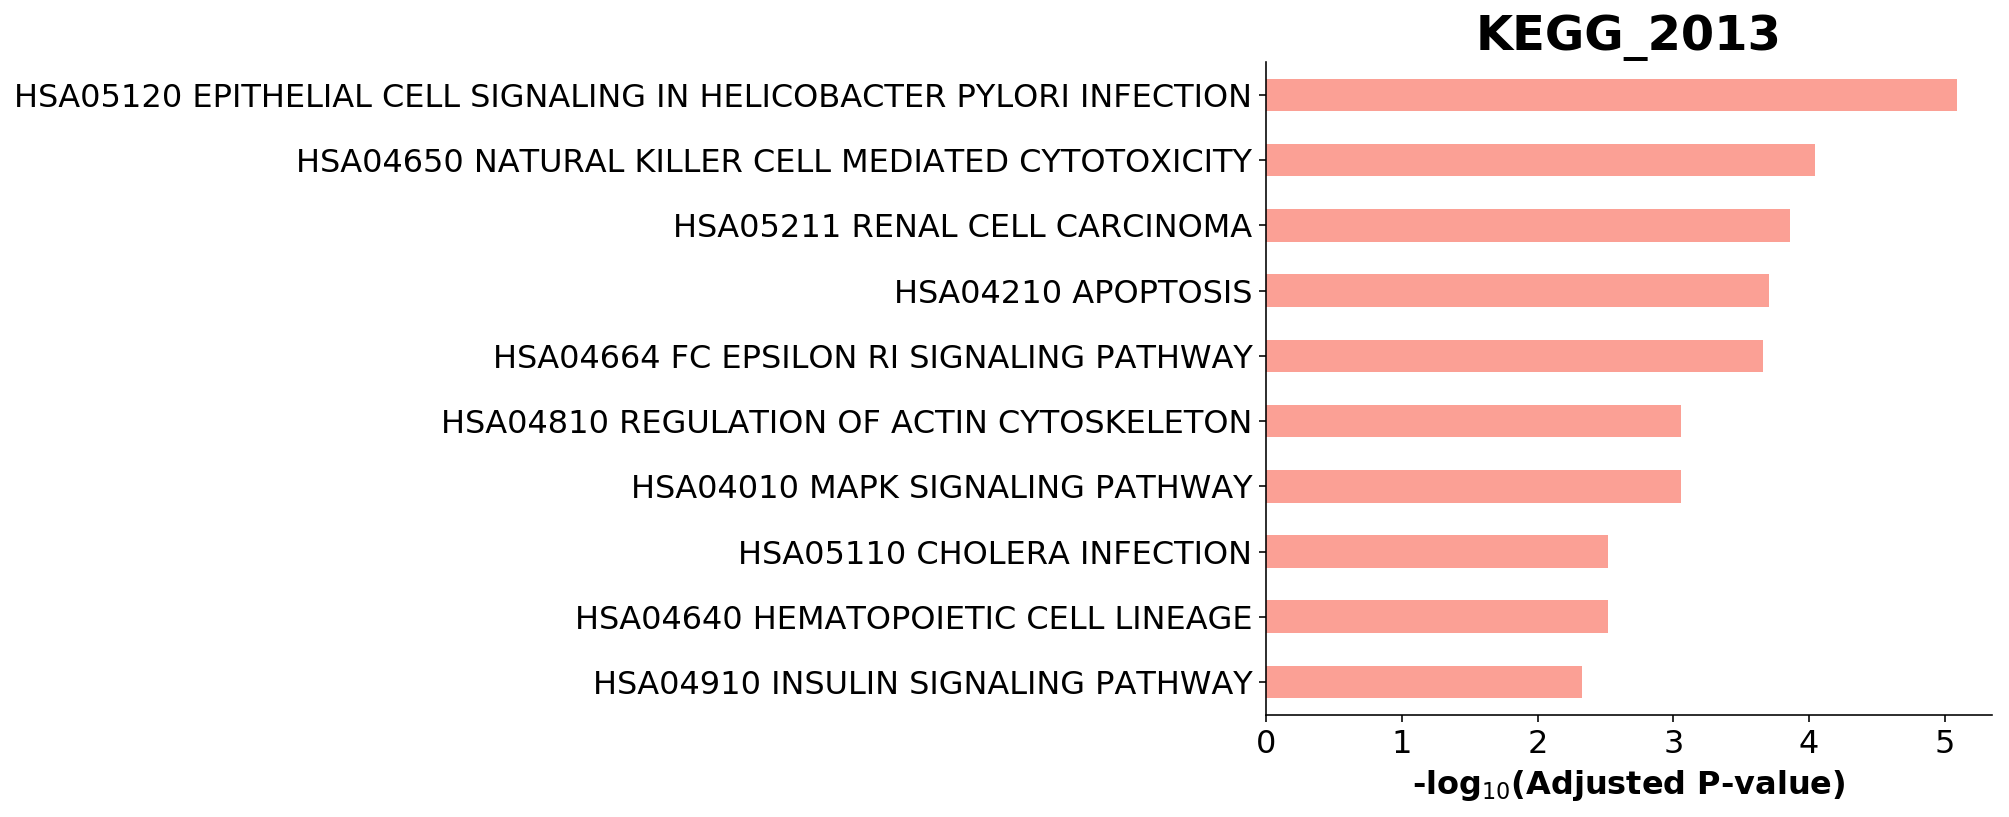

In [11]:
# simple plotting function
from gseapy.plot import barplot, dotplot
barplot(enr.res2d,title='KEGG_2013',)

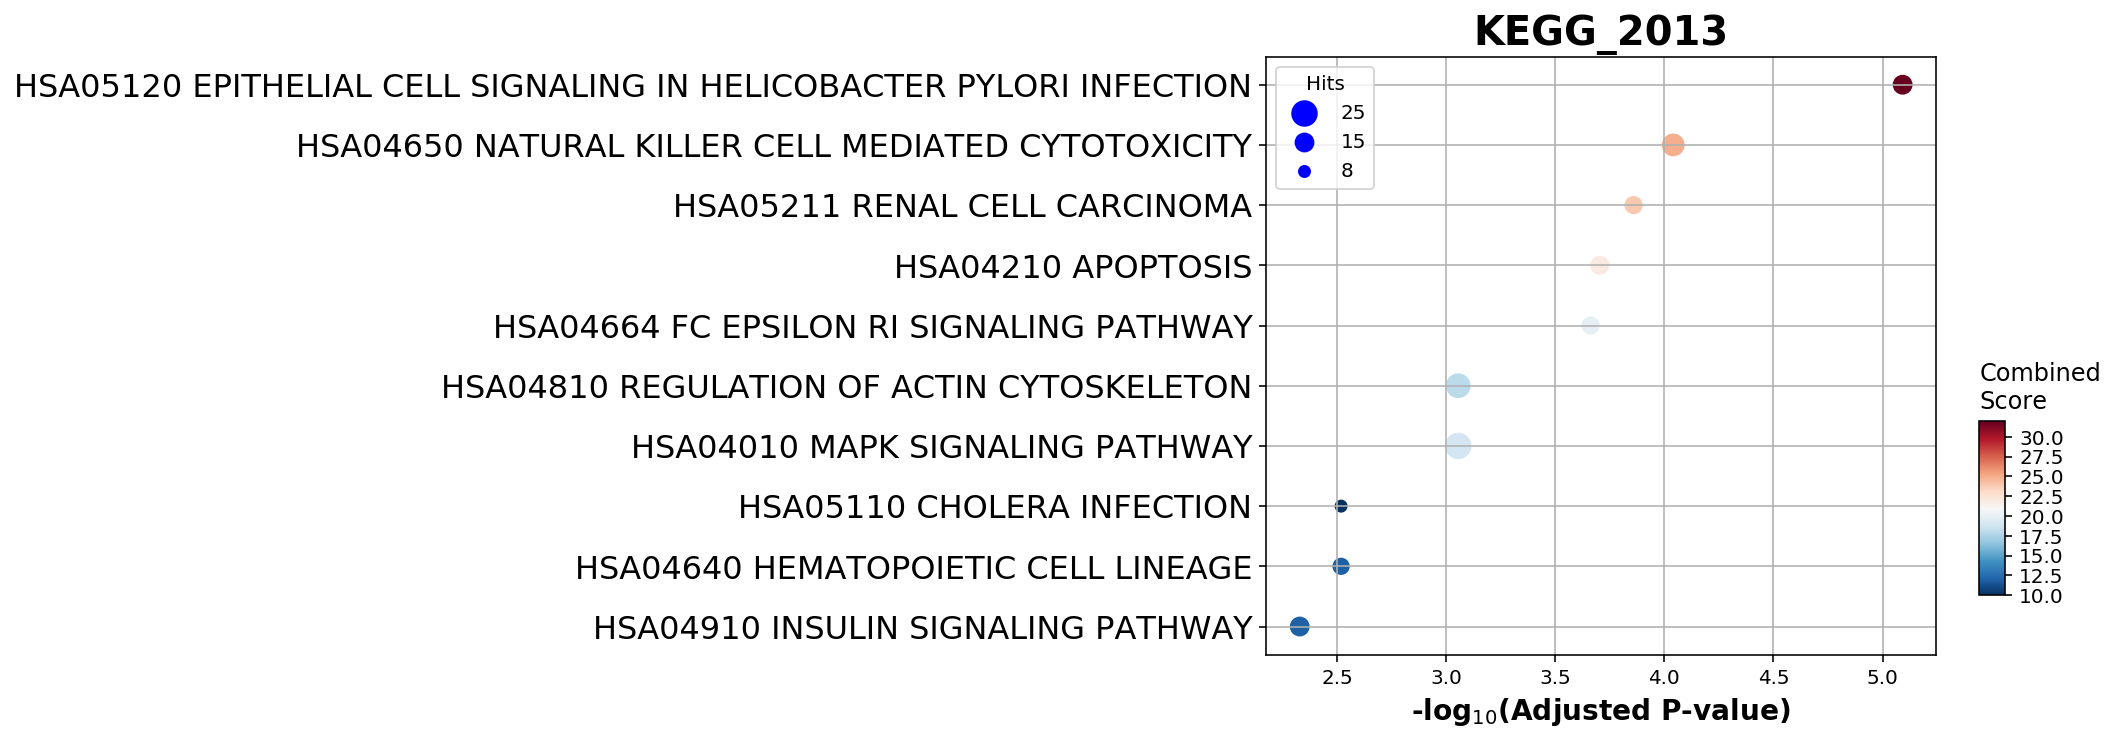

In [12]:
dotplot(enr.res2d, title='KEGG_2013',)

### 2) Command line usage 

You may also want to use enrichr in command line  

the option **-v** will print out the progress of your job

In [13]:
# !gseapy enrichr -i ./data/gene_list.txt \
#                 --ds BP2017 \
#                 -g GO_Biological_Process_2017 \
#                 -v -o test/enrichr_BP

## 3. Prerank example

### 1) Assign prerank()  with a pd.DataFrame, pd.Series , or a txt file
Do not include header in your gene list !  
GSEApy will skip any comment lines startswith "#".  
Only contains two columns, or one cloumn with gene_name indexed when assign a ``DataFrame`` to prerank

In [14]:
rnk = pd.read_table("./data/edb/gsea_data.gsea_data.rnk", header=None)
rnk.head()

,0,1
0,CTLA2B,2.502482
1,SCARA3,2.095578
2,LOC100044683,1.116398
3,CMBL,0.877640
4,CLIC6,0.822181


In [15]:
# run prerank
# enrichr libraries are supported by prerank module. Just provide the name
# use 4 process to acceralate the permutation speed
pre_res = gp.prerank(rnk=rnk, gene_sets='KEGG_2016', 
                     processes=4,
                     permutation_num=100, # reduce number to speed up test
                     outdir='test/prerank_report_kegg',format='png')

Leading edge genes save to the final output results

In [16]:
#access results through res2d attribute or results
pre_res.res2d.head()

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
Pathways in cancer_Homo sapiens_hsa05200,-0.188934,-1.014963,0.347826,0.411371,397,27,TGFBR2;LAMB3;RET;PDGFRB;ADCY6;ETS1;TGFA;WNT9A;...,VEGFC;LPAR4;LEF1;RUNX1T1
Cytokine-cytokine receptor interaction_Homo sapiens_hsa04060,0.418234,1.560706,0.031746,0.505824,265,18,IL13RA1;CSF1;CCL2;TGFBR2;CD40;IL10RB;CXCL10;CX...,IL13RA1;CSF1;CCL2;TGFBR2;CD40;IL10RB;CXCL10
PI3K-Akt signaling pathway_Homo sapiens_hsa04151,0.191372,0.805893,0.727273,0.783456,341,22,CSF1;EFNA1;COL6A1;THBS4;LAMB3;PDGFRB;GNG13;FLT...,CSF1;EFNA1;COL6A1;THBS4;LAMB3
MAPK signaling pathway_Homo sapiens_hsa04010,0.179667,0.706097,0.855072,0.820300,255,18,CACNA1H;TGFBR2;FLNC;MAP3K5;PDGFRB;PPP3CC;NFATC...,CACNA1H;TGFBR2;FLNC;MAP3K5;PDGFRB;PPP3CC
Rap1 signaling pathway_Homo sapiens_hsa04015,0.221306,0.846775,0.661538,0.831947,211,19,CSF1;EFNA1;ARAP3;PDGFRB;ADCY6;PRKD1;MAPK13;FLT...,CSF1;EFNA1


### 2) How to generate your GSEA plot inside python console  
visualize it using ``gseaplot``

In [17]:
# extract geneset terms in res2d
terms = pre_res.res2d.index
terms

Index(['Pathways in cancer_Homo sapiens_hsa05200',
       'Cytokine-cytokine receptor interaction_Homo sapiens_hsa04060',
       'PI3K-Akt signaling pathway_Homo sapiens_hsa04151',
       'MAPK signaling pathway_Homo sapiens_hsa04010',
       'Rap1 signaling pathway_Homo sapiens_hsa04015',
       'HTLV-I infection_Homo sapiens_hsa05166',
       'Metabolic pathways_Homo sapiens_hsa01100',
       'Ras signaling pathway_Homo sapiens_hsa04014',
       'Focal adhesion_Homo sapiens_hsa04510'],
      dtype='object', name='Term')

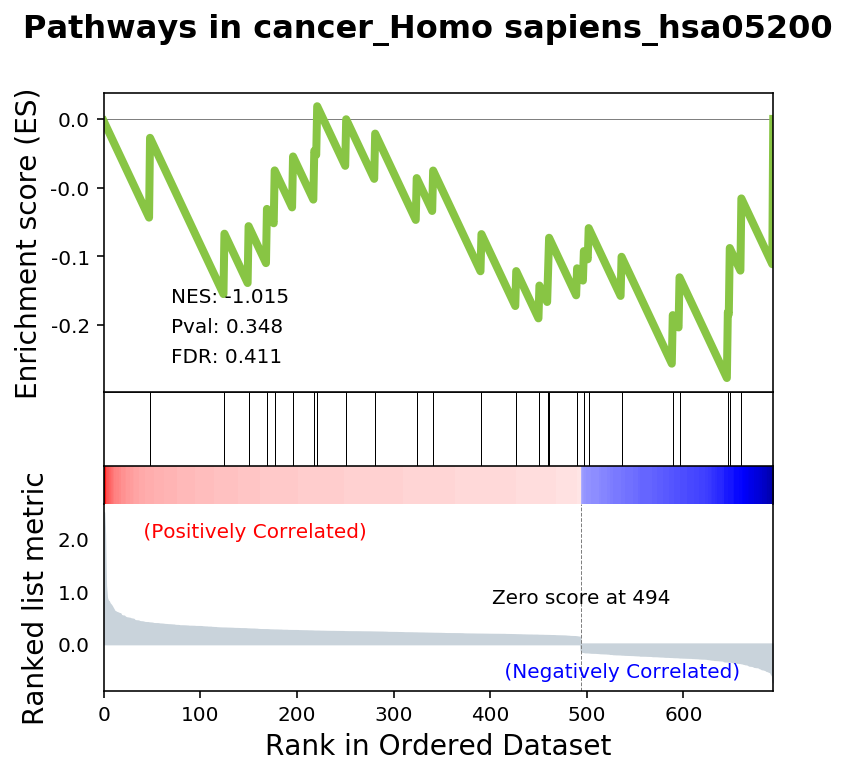

In [18]:
## easy way
from gseapy.plot import gseaplot
gseaplot(rank_metric=pre_res.ranking, term=terms[0], **pre_res.results[terms[0]])

### 3) Command line usage 

You may also want to use prerank in command line

In [19]:
# ! gseapy prerank -r temp.rnk -g temp.gmt -o prerank_report_temp

## 4. GSEA Example

### 1)  Assign gsea() with a pandas DataFrame, .gct format file, or a text file

and cls with a list object or just .cls format file 

In [20]:
phenoA, phenoB, class_vector =  gp.parser.gsea_cls_parser("./data/P53.cls")

In [21]:
#class_vector used to indicate group attributes for each sample
print(class_vector)

['MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT']


In [22]:
gene_exp = pd.read_table("./data/P53.txt")
gene_exp.head()

,NAME,DESCRIPTION,786-0,BT-549,CCRF-CEM,COLO 205,EKVX,HCC-2998,HCT-15,HOP-62,...,MCF7,MOLT-4,NCI-H460,OVCAR-4,SF-539,SK-MEL-5,SR,UACC-257,UACC-62,UO-31
0,TACC2,na,46.05,82.17,16.87,98.60,141.02,114.32,134.34,44.95,...,68.14,32.21,105.89,64.99,53.52,85.47,18.69,32.16,45.70,48.13
1,C14orf132,na,108.34,59.04,25.61,33.11,42.53,9.12,9.36,310.96,...,159.32,10.71,13.59,53.78,57.57,86.80,17.30,102.66,62.16,73.44
2,AGER,na,42.20,25.75,76.01,40.41,32.17,48.28,58.27,42.40,...,51.50,61.48,44.44,45.68,54.17,62.53,83.18,56.57,50.40,36.75
3,32385_at,na,7.43,13.94,8.55,21.13,15.09,19.05,16.47,7.60,...,30.77,21.27,13.36,16.19,12.07,17.62,22.60,4.50,14.59,11.33
4,RBM17,na,11.40,3.00,3.16,2.34,4.43,1.56,6.04,6.16,...,1.62,2.77,4.42,8.91,12.28,3.04,10.13,8.32,8.23,3.91


In [23]:
print("positively correlated: ", phenoA)

positively correlated:  MUT


In [24]:
print("negtively correlated: ", phenoB)

negtively correlated:  WT


In [ ]:
# run gsea
# enrichr libraries are supported by gsea module. Just provide the name

gs_res = gp.gsea(data=gene_exp, # or data='./P53_resampling_data.txt'
                 gene_sets='KEGG_2016', # enrichr library names
                 cls= './data/P53.cls', # cls=class_vector
                 #set permutation_type to phenotype if samples >=15
                 permutation_type='phenotype', 
                 permutation_num=100, # reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 no_plot=True, # Skip plotting
                 method='signal_to_noise',
                 processes=4,
                 format='png')

In [ ]:
#access the dataframe results throught res2d attribute
gs_res.res2d.head()

### 2) Show the gsea plots

The **gsea** module will generate heatmap for genes in each gene sets in the backgroud.  
But if you need to do it yourself, use the code below

In [ ]:
from gseapy.plot import gseaplot, heatmap
terms = gs_res.res2d.index
gseaplot(gs_res.ranking, term=terms[0], **gs_res.results[terms[0]])

In [ ]:
# plotting heatmap
genes = gs_res.res2d.genes[0].split(";")
heatmap(df = gs_res.heatmat.loc[genes], z_score=0, title=terms[0], figsize=(18,6))

### 3) Command line usage 

You may also want to use gsea in command line

In [ ]:
# !gseapy gsea -d ./data/P53_resampling_data.txt \
#              -g KEGG_2016 -c ./data/P53.cls \
#              -o test/gsea_reprot_2 \
#              -v --no-plot \
#              -t phenotype

## 5. Single Sample GSEA example

**Note: When you run ssGSEA, all genes names in your gene_sets file should be found in your expression table**

### 1) Assign ssgsea() with a txt file, gct file, pd.DataFrame, or pd.Seires(gene name as index).  


In [ ]:
# txt, gct file input
ss = gp.ssgsea(data="./data/testSet_rand1200.gct",
               gene_sets="./data/randomSets.gmt", 
               outdir='test/ssgsea_report', 
               sample_norm_method='rank', # choose 'custom' for your own rank list
               permutation_num=0, # skip permutation procedure, because you do need it
               no_plot=True, # skip plotting to speed up
               processes=4, format='png')

In [ ]:
ss.res2d

In [ ]:
from gseapy.plot import heatmap
heatmap(ss.res2d)

In [ ]:
# or assign a dataframe, or Series to ssgsea()
ssdf = pd.read_table("./data/temp.txt",header=None)
ssdf.head()

In [ ]:
# dataframe with one column is also supported by ssGSEA or Prerank
# But you have to set gene_names as index
ssdf2 = ssdf.set_index(0)
ssdf2.head()

In [ ]:
type(ssdf2)

In [ ]:
ssSeries = ssdf2.squeeze()
type(ssSeries)

In [ ]:
# reuse data
df = pd.read_table("./data/P53_resampling_data.txt")
df.head()

In [ ]:
# Series, DataFrame Example
# supports dataframe and series
ssgs = []
for i, dat in enumerate([ssdf, ssdf2, ssSeries, df]):
    sstemp = gp.ssgsea(data=dat, 
                       gene_sets="./data/genes.gmt", 
                       outdir='test/ssgsea_report_'+str(i),
                       scale=False, # set scale to False to get real original ES
                       permutation_num=0, # skip permutation procedure, because you do need it
                       no_plot=True, # skip plotting to speed up
                       processes=4, 
                       format='png')
    ssgs.append(sstemp)

### 2) Access Enrichment Score (ES) and NES

results save to two attribute:

1. obj.resultsOnSamples: ES
2. obj.res2d: NES

In [ ]:
# normalized es save to res2d attri
# one sample input
# NES
ssgs[0].res2d.head()

**Note**: 
If you want to obtain the real original enrichment score,  
you have to set ``scale=False``

In [ ]:
# ES
# convert dict to DataFrame
es = pd.DataFrame(ssgs[-1].resultsOnSamples)
es.head()

In [ ]:
# if set scale to True, then 
# Scaled ES equal to es/gene_numbers
ses = es/df.shape[0]
ses

In [ ]:
# NES 
# scale or no will no affect final nes value
nes = ssgs[-1].res2d
nes.head()

### 3) command line usage of single sample gsea

In [ ]:
# set --no-scale to obtain the real original enrichment score
# !gseapy ssgsea -d ./data/testSet_rand1200.gct \
#                -g data/temp.gmt \
#                -o test/ssgsea_report2  \
#                -p 4 --no-plot --no-scale

## 6. Replot Example

### 1) locate your directory

notes: ``replot`` module need to find edb folder to work properly.
keep the file tree like this:
```
data
 |--- edb
 |    |--- C1OE.cls
 |    |--- gene_sets.gmt
 |    |--- gsea_data.gsea_data.rnk
 |    |--- results.edb

```

In [ ]:
# run command inside python console
rep = gp.replot(indir="./data", outdir="test/replot_test")

### 2) command line usage of replot

In [ ]:
# !gseapy replot -i data -o test/replot_test